In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
upload=files.upload()

Saving Used Car Dataset.csv to Used Car Dataset.csv


In [3]:
df=pd.read_csv('Used Car Dataset.csv')

In [4]:
df.head()

,Unnamed: 0,car_name,registration_year,insurance_validity,fuel_type,seats,kms_driven,ownsership,transmission,manufacturing_year,mileage(kmpl),engine(cc),max_power(bhp),torque(Nm),price(in lakhs)
0,0,2017 Mercedes-Benz S-Class S400,Jul-17,Comprehensive,Petrol,5,56000,First Owner,Automatic,2017,7.81,2996.0,2996.0,333.0,63.75
1,1,2020 Nissan Magnite Turbo CVT XV Premium Opt BSVI,Jan-21,Comprehensive,Petrol,5,30615,First Owner,Automatic,2020,17.40,999.0,999.0,9863.0,8.99
2,2,2018 BMW X1 sDrive 20d xLine,Sep-18,Comprehensive,Diesel,5,24000,First Owner,Automatic,2018,20.68,1995.0,1995.0,188.0,23.75
3,3,2019 Kia Seltos GTX Plus,Dec-19,Comprehensive,Petrol,5,18378,First Owner,Manual,2019,16.50,1353.0,1353.0,13808.0,13.56
4,4,2019 Skoda Superb LK 1.8 TSI AT,Aug-19,Comprehensive,Petrol,5,44900,First Owner,Automatic,2019,14.67,1798.0,1798.0,17746.0,24.00


In [ ]:
df.isnull().sum()

In [ ]:
df.dropna(inplace=True)

In [5]:
df['Rupees'] = df['price(in lakhs)'] * 100000

# Drop the original column
df.drop(columns=['price(in lakhs)'],inplace=True)

In [6]:
text_to_delete = 'Power Steering'
text_to_delete2 = 'Power Windows Front'
text_to_delete3 = 'Air Conditioner'

# Define the column to check
column_to_check = 'manufacturing_year'  # Replace 'column_name' with the name of the column you want to check

# Filter the DataFrame to remove rows containing any of the specified texts
df_final = df[~(df[column_to_check].str.contains(text_to_delete) | df[column_to_check].str.contains(text_to_delete2) | df[column_to_check].str.contains(text_to_delete3))]

In [7]:
ownership_map = {'First Owner': 1, 'Second Owner': 2}  # Add more mappings as needed

# Replace values in the 'ownership' column with numbers
df_final['ownsership'] = df_final['ownsership'].map(ownership_map)

# Print the modified DataFrame
df_final.head()

<ipython-input-7-1814edb103bf>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['ownsership'] = df_final['ownsership'].map(ownership_map)


,Unnamed: 0,car_name,registration_year,insurance_validity,fuel_type,seats,kms_driven,ownsership,transmission,manufacturing_year,mileage(kmpl),engine(cc),max_power(bhp),torque(Nm),Rupees
0,0,2017 Mercedes-Benz S-Class S400,Jul-17,Comprehensive,Petrol,5,56000,1.0,Automatic,2017,7.81,2996.0,2996.0,333.0,6375000.0
1,1,2020 Nissan Magnite Turbo CVT XV Premium Opt BSVI,Jan-21,Comprehensive,Petrol,5,30615,1.0,Automatic,2020,17.40,999.0,999.0,9863.0,899000.0
2,2,2018 BMW X1 sDrive 20d xLine,Sep-18,Comprehensive,Diesel,5,24000,1.0,Automatic,2018,20.68,1995.0,1995.0,188.0,2375000.0
3,3,2019 Kia Seltos GTX Plus,Dec-19,Comprehensive,Petrol,5,18378,1.0,Manual,2019,16.50,1353.0,1353.0,13808.0,1356000.0
4,4,2019 Skoda Superb LK 1.8 TSI AT,Aug-19,Comprehensive,Petrol,5,44900,1.0,Automatic,2019,14.67,1798.0,1798.0,17746.0,2400000.0


In [9]:
df_final.isnull().sum()

Unnamed: 0             0
car_name               0
registration_year      0
insurance_validity     0
fuel_type              0
seats                  0
kms_driven             0
ownsership            23
transmission           0
manufacturing_year     0
mileage(kmpl)          3
engine(cc)             3
max_power(bhp)         3
torque(Nm)             4
Rupees                 0
dtype: int64

In [10]:
df_final.dropna(inplace=True)

<ipython-input-10-80e09d144f13>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final.dropna(inplace=True)


In [12]:
import pandas as pd
from datetime import datetime
def convert_registration_date(date_str):
    if pd.isna(date_str):
        return None
    try:
        parsed_date = datetime.strptime(date_str, "%b-%y")
        return parsed_date.strftime("%-m-%Y")
    except ValueError:
        return None

# Apply the conversion function to the registration_year column
df_final['registration_year'] = df_final['registration_year'].apply(convert_registration_date)

df_final.head(20)

<ipython-input-12-e909a72331c3>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['registration_year'] = df_final['registration_year'].apply(convert_registration_date)


,Unnamed: 0,car_name,registration_year,insurance_validity,fuel_type,seats,kms_driven,ownsership,transmission,manufacturing_year,mileage(kmpl),engine(cc),max_power(bhp),torque(Nm),Rupees
0,0,2017 Mercedes-Benz S-Class S400,7-2017,Comprehensive,Petrol,5,56000,1.0,Automatic,2017,7.81,2996.0,2996.0,333.0,6375000.0
1,1,2020 Nissan Magnite Turbo CVT XV Premium Opt BSVI,1-2021,Comprehensive,Petrol,5,30615,1.0,Automatic,2020,17.40,999.0,999.0,9863.0,899000.0
2,2,2018 BMW X1 sDrive 20d xLine,9-2018,Comprehensive,Diesel,5,24000,1.0,Automatic,2018,20.68,1995.0,1995.0,188.0,2375000.0
3,3,2019 Kia Seltos GTX Plus,12-2019,Comprehensive,Petrol,5,18378,1.0,Manual,2019,16.50,1353.0,1353.0,13808.0,1356000.0
4,4,2019 Skoda Superb LK 1.8 TSI AT,8-2019,Comprehensive,Petrol,5,44900,1.0,Automatic,2019,14.67,1798.0,1798.0,17746.0,2400000.0
5,5,2017 Honda Jazz 1.2 S i VTEC,7-2017,Third Party insurance,Petrol,5,42000,1.0,Manual,2017,18.70,1199.0,1199.0,887.0,545000.0
6,6,2018 Hyundai Grand i10 1.2 Kappa Sportz BSIV,2-2019,Comprehensive,Petrol,5,36739,1.0,Manual,2018,18.90,1197.0,1197.0,8186.0,512000.0
7,7,2018 Hyundai Creta 1.6 SX,7-2018,Comprehensive,Petrol,5,76000,1.0,Manual,2018,15.80,1591.0,1591.0,1213.0,930000.0
8,8,2015 Mercedes-Benz S-Class S 350 CDI,4-2015,Comprehensive,Diesel,5,68000,2.0,Automatic,2015,13.50,2987.0,2987.0,25479.0,4200000.0
9,9,2019 Tata Nexon 1.2 Revotron XZ Plus,3-2019,Comprehensive,Petrol,5,28783,1.0,Manual,2019,17.00,1198.0,1198.0,1085.0,802000.0


In [13]:
df_final.dropna(inplace=True)

<ipython-input-13-80e09d144f13>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final.dropna(inplace=True)


In [11]:
import pandas as pd
from scipy import stats


# Group the data by ownership status
ownership_groups = df_final.groupby('ownsership')['Rupees']

# Perform one-way ANOVA test to compare mean prices between ownership categories
f_statistic, p_value = stats.f_oneway(*[group for _, group in ownership_groups])

print("F-statistic:", f_statistic)
print("P-value:", p_value)


F-statistic: 10.450225231360706
P-value: 0.001253466070854339


In [14]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import ttest_ind
# Separate the prices of cars based on transmission type
automatic_prices = df_final[df_final['transmission'] == 'Automatic']['Rupees']
manual_prices = df_final[df_final['transmission'] == 'Manual']['Rupees']

# Perform independent samples t-test
t_statistic, p_value = ttest_ind(automatic_prices, manual_prices)

# Display the p-value
print("P-value:", p_value)

P-value: 0.26618164730182414


In [16]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
# Calculate Pearson correlation coefficient and p-value
corr_coefficient, p_value = pearsonr(df_final['mileage(kmpl)'], df_final['Rupees'])

# Print the results
print("Pearson correlation coefficient:", corr_coefficient)
print("P-value:", p_value)

Pearson correlation coefficient: 0.07251852962304507
P-value: 0.006834217636664694


In [17]:
import pandas as pd
import numpy as np
from statsmodels.api import OLS, add_constant

# Define the independent variable (mileage) and dependent variable (price)
X = df_final['mileage(kmpl)']
y = df_final['Rupees']

# Add a constant to the independent variable for the intercept
X = add_constant(X)

# Perform the linear regression
model = OLS(y, X).fit()

# Get the coefficient and standard error for the mileage variable
mileage_coefficient = model.params['mileage(kmpl)']
mileage_std_error = model.bse['mileage(kmpl)']

# Calculate the z-score for the mileage coefficient
z_score = mileage_coefficient / mileage_std_error

# Calculate the p-value for the z-score
p_value = 2 * (1 - stats.norm.cdf(abs(z_score)))

# Print the results
print("Z-score:", z_score)
print("P-value:", p_value)


Z-score: 2.708873345486413
P-value: 0.006751210658143769


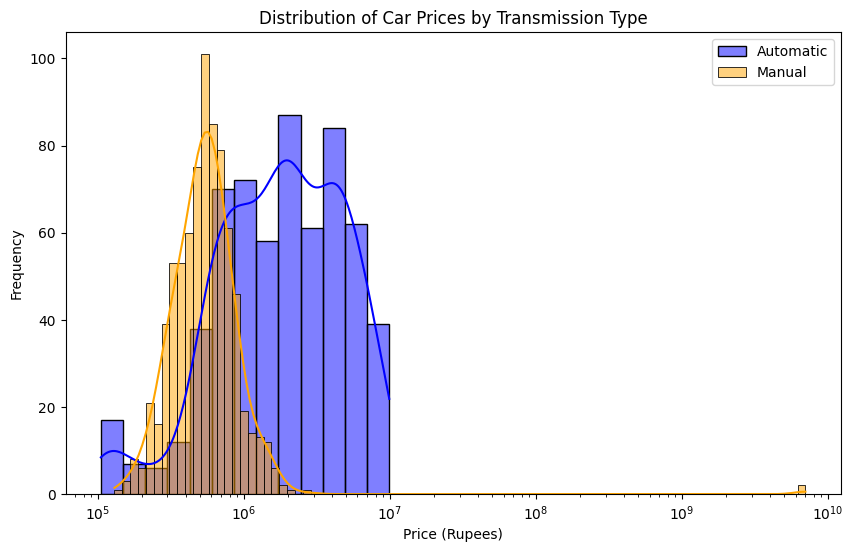

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = df_final

# Histogram for car prices by transmission type
plt.figure(figsize=(10, 6))
sns.histplot(data[data['transmission'] == 'Automatic']['Rupees'], kde=True, color='blue', label='Automatic', log_scale=True)
sns.histplot(data[data['transmission'] == 'Manual']['Rupees'], kde=True, color='orange', label='Manual', log_scale=True)
plt.title('Distribution of Car Prices by Transmission Type')
plt.xlabel('Price (Rupees)')
plt.ylabel('Frequency')
plt.legend()
plt.show()


In [20]:
df_final['brand'] = df_final['car_name'].str.split().str[1]


<ipython-input-20-259682f9061f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_final['brand'] = df_final['car_name'].str.split().str[1]


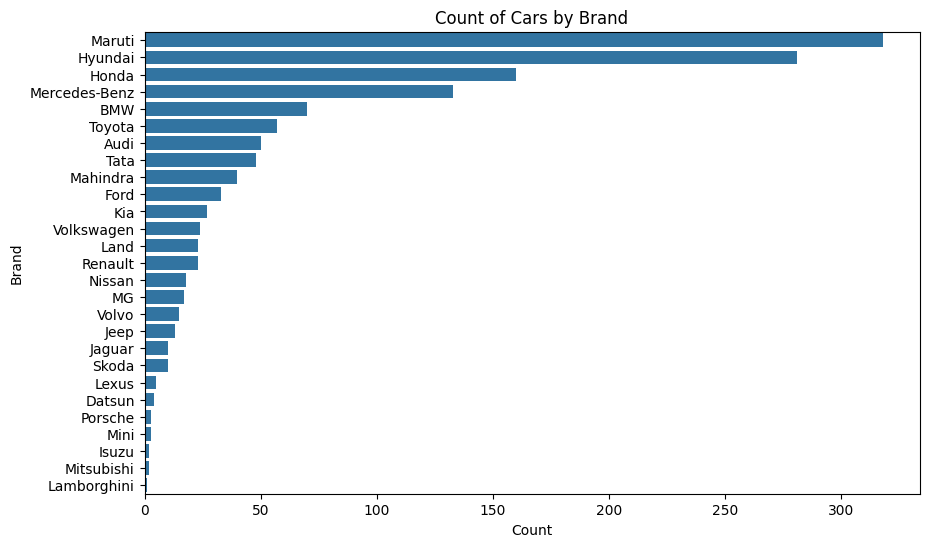

In [22]:

# Visualize the count of cars by brand
plt.figure(figsize=(10, 6))
sns.countplot(y="brand", data=df_final, order=df_final['brand'].value_counts().index)
plt.title("Count of Cars by Brand")
plt.xlabel("Count")
plt.ylabel("Brand")
plt.show()